In [1]:
srand(1)
m = 25;
n = 10;
A = randn(m, n);
b = randn(m, 1);

In [2]:
using Convex, SCS
set_default_solver(SCSSolver(verbose=0));
gammas = logspace(-4, 2, 100);
x_values = zeros(n, length(gammas));
x = Variable(n);
for i=1:length(gammas)
    cost = sum_squares(A*x - b) + gammas[i]*norm(x,1);
    problem = minimize(cost, [norm(x, Inf) <= 1]);
    solve!(problem);
    x_values[:,i] = evaluate(x);
end

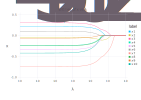

In [3]:
# Plot the regularization path.
using Gadfly, DataFrames
df = DataFrame(λ=gammas, x=vec(x_values[1,:]), label="x1")
for i=2:n
    df = vcat(df, DataFrame(λ=gammas, x=vec(x_values[i,:]), label=string("x", i)));
end
plot(df, x="λ", y="x", color="label", Geom.line, Scale.x_log10, Guide.title("Entries of x vs λ"))